In [8]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from helpers.least_squares import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [9]:
from helpers.proj1_helpers import *
# Aya : '/Users/mac/Documents/GitHub/ml-project-1-aaa_project1/data/train.csv' 
DATA_TRAIN_PATH = '/home/adeye/Documents/EPFL/MA1/ML_course/projects/ml-project-1-aaa_project1/train.csv' 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

## Do your thing crazy machine learning thing here :) ...

In [52]:
from helpers.gradient_descent import *
from helpers.least_squares import *
from helpers.stochastic_gradient_descent import *
from helpers.ridge import *
from helpers.processing import *
from helpers.cross_validation import *
from helpers.feature_transformation import *

## Pre-processing our DataSet

In [11]:
jet_0,label_0,jet_1,label_1,jet_2_3, label_2_3= pre_process_data_pipeline(tX,y)

## Learning Algorithms After Cleaning Our DataSet

### Least Squares With Gradient Descent

jet_0,label_0,jet_1,label_1,jet_2_3, label_2_3= groupy_by_jet_num(tX,y)
    
remove_outliers(tX)
init_weights = np.ones((30,))
print(y.shape)
print(tX.shape)

weights,loss =  gradient_descent(y, tX,init_weights , 50000, .01)

print(weights)
print("{:e}".format(loss))

## Least Squares with OLS

weight,loss= least_squares(y,tX)
print(compute_squared_loss(y,tX,weight))

## Least Squares With Stochastic Gradient Descent 

remove_outliers(tX)
init_weights = np.ones((30,))
print(y.shape)
print(tX.shape)

weights,loss =  stochastic_gradient_descent(y, tX,init_weights , 500, 0.01, batch_size=1)

print(weights)
print(loss)

## Least Squares With Ridge Regression 

weights, loss = ridge(y, tX, 0.025)
print("{:e}".format(np.sqrt(2*loss)))

## Parameter Tuning

In [22]:
print(jet_0.shape)
print(label_0.shape)

degrees  = range(25)
lambda_ = 1e-6
k_fold = 10
k_indices = build_k_indices(label_1,10,1294)

rmse_tr = []
rmse_te = []
i = 0;
for degree in degrees:
    i+=1
    print(i)
    rmse_tr_temp = []
    rmse_te_temp = []
        
    for k in range(k_fold):
        x_tr,y_tr,x_te,y_te = split_validation(label_1,jet_1,k_indices,k)
        
        x_tr = poly_expansion(x_tr,degree)
        x_te = poly_expansion(x_te,degree)
        weights_tr, loss_tr = ridge(y_tr, x_tr, lambda_)
        weights_te, loss_te = ridge(y_te, x_te, lambda_)
        rmse_tr_temp.append(loss_tr)
        rmse_te_temp.append(loss_te)
    rmse_tr.append(np.mean(rmse_tr_temp))
    rmse_te.append(np.mean(rmse_te_temp))

(99913, 18)
(99913,)
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


In [21]:
print(jet_0.shape)
print(label_0.shape)

lambdas = np.logspace(-7,0,30)
k_fold = 10
k_indices = build_k_indices(label_1,10,1294)

rmse_tr = []
rmse_te = []
i = 0;
for lambda_ in lambdas:
    i+=1
    print(i)
    rmse_tr_temp = []
    rmse_te_temp = []
        
    for k in range(k_fold):
        x_tr,y_tr,x_te,y_te = split_validation(label_1,jet_1,k_indices,k)
        weights_tr, loss_tr = ridge(y_tr, x_tr, lambda_)
        weights_te, loss_te = ridge(y_te, x_te, lambda_)
        rmse_tr_temp.append(loss_tr)
        rmse_te_temp.append(loss_te)
    rmse_tr.append(np.mean(rmse_tr_temp))
    rmse_te.append(np.mean(rmse_te_temp))
        

(99913, 18)
(99913,)
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


No handles with labels found to put in legend.


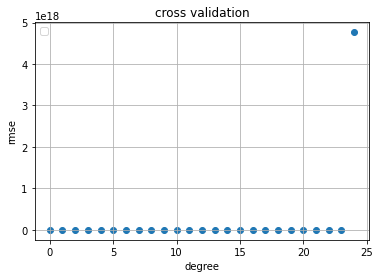

0.29375815229410696


In [53]:
cross_validation_visualization(degrees,rmse_tr,rmse_te)
#print(rmse_tr)
#print(rmse_te)

degree = 6
lambda_ = 1e-6
poly = poly_expansion(jet_0,degree)
weight,loss = ridge(label_0, poly, lambda_)

print(loss)

## Generate predictions and save ouput in csv format for submission:

In [80]:
DATA_TEST_PATH = '/home/adeye/Documents/EPFL/MA1/ML_course/projects/ml-project-1-aaa_project1/test.csv' 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)



In [81]:
OUTPUT_PATH = '/home/adeye/Documents/EPFL/MA1/ML_course/projects/ml-project-1-aaa_project1/output.csv' 
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)